# Visualizations. Exercise 1. Shapefiles

In [1]:
# Import required libraries

In [1]:
import geopandas as gpd

In [2]:
# Load the geographic data of municipalities downloaded from Sergas
# Galician cartography in vectorial format for geographic information systems.
# https://www.sergas.es/Saude-publica/GIS-Cartografia-Galicia-formato-vectorial-SHP

In [3]:
df_concellos = gpd.read_file('../datasets/Concellos/Concellos_IGN.shp')
df_concellos.head()

,NomeConcel,CodCONC,Concello,CodCOM,CodPROV,NomeCapita,Comarca,Provincia,CODIGOINE,NomeMAY,Shape_Leng,Shape_Area,VALOR,geometry
0,Sarreaus,32078.0,Sarreaus,32.0,32.0,Sarreaus,A Limia,Ourense,32078,SARREAUS,40754.205361,7.725592e+07,NaN,"POLYGON ((608813.195 4664453.146, 608701.934 4..."
1,Taboadela,32079.0,Taboadela,37.0,32.0,Taboadela,Ourense,Ourense,32079,TABOADELA,23378.040256,2.517205e+07,NaN,"POLYGON ((593815.346 4676211.812, 593751.767 4..."
2,A Bola,32014.0,"Bola, A",39.0,32.0,"Bola, A",Terra De Celanova,Ourense,32014,A BOLA,25533.370597,3.488287e+07,NaN,"POLYGON ((588198.821 4663569.770, 588204.697 4..."
3,Maside,32045.0,Maside,35.0,32.0,Maside,O Carballiño,Ourense,32045,MASIDE,27891.138676,4.001874e+07,NaN,"POLYGON ((577375.148 4694642.899, 577328.854 4..."
4,Trasmiras,32082.0,Trasmiras,32.0,32.0,Trasmiras,A Limia,Ourense,32082,TRASMIRAS,38334.093117,5.670926e+07,NaN,"POLYGON ((613123.723 4648827.622, 613103.413 4..."


In [4]:
# Show coordinate system
# https://spatialreference.org/ref/epsg/etrs89-utm-zone-29n/
print(df_concellos.crs)

epsg:25829


In [5]:
# Paint provinces with a different color

<AxesSubplot:>

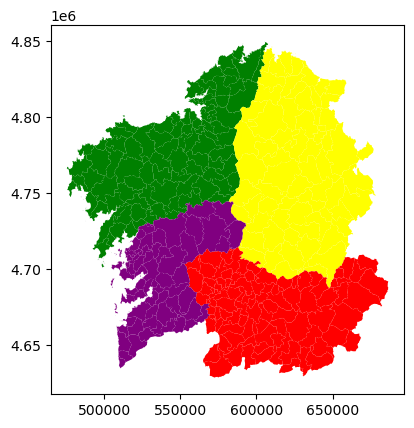

In [6]:
df_concellos['color'] = df_concellos.Provincia.apply(lambda x: 'red' if x=='Ourense' else 'green' if x=='A Coruña' else 'purple' if x=='Pontevedra' else 'yellow')
df_concellos.plot(color=df_concellos.color)

In [9]:
# Paint the large and small counties in different colors
# The small ones are the ones below the average

<AxesSubplot:>

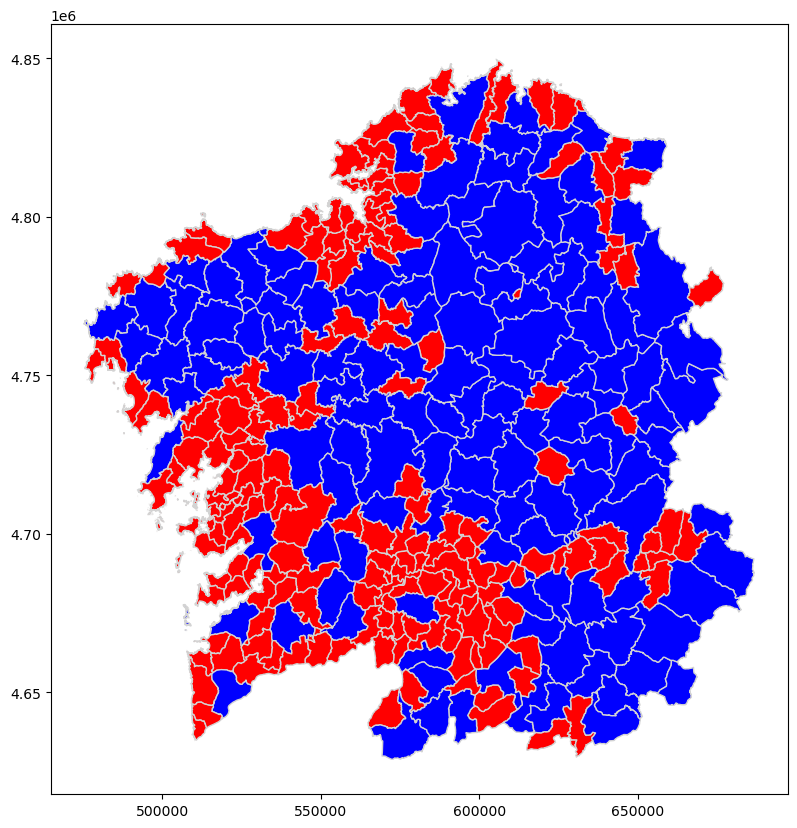

In [10]:
area_media = df_concellos.Shape_Area.mean()
df_concellos['color'] = df_concellos.Shape_Area.apply(lambda x: 'red' if x < area_media else 'blue')
df_concellos.plot(color=df_concellos.color,figsize=(10,10),edgecolor='lightgray')


In [11]:
# Do you think that there are exceptionally small municipalities in relation to the rest?
# Will there be any too big?
# Highlight on a map the extremely small or large municipalities in relation to the rest.

<AxesSubplot:>

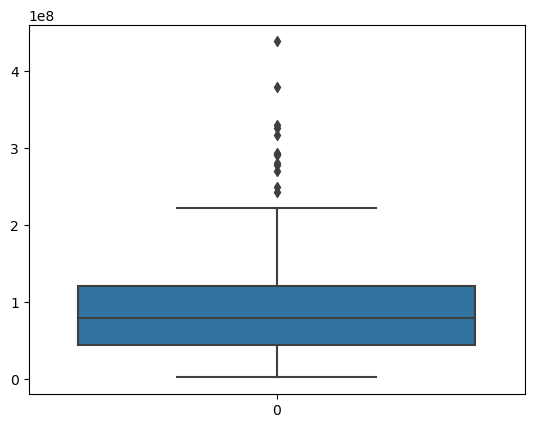

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.boxplot(df_concellos['Shape_Area'])

In [8]:
def tukey_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers

outliers = df_concellos.iloc[list(tukey_outliers(df_concellos.Shape_Area).index)]

<AxesSubplot:>

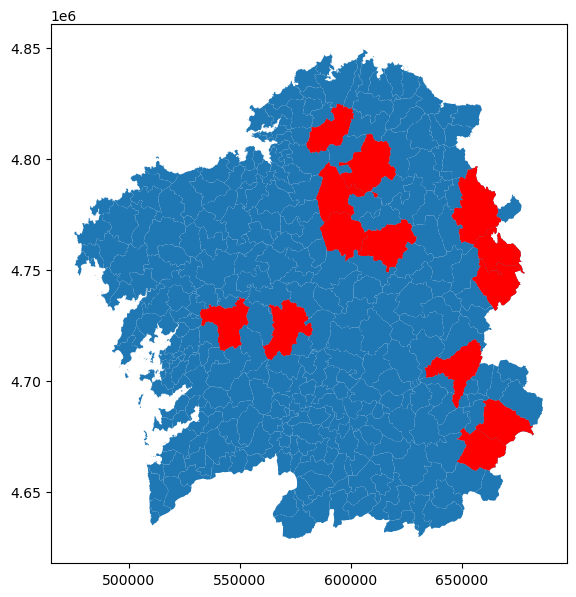

In [9]:
base = df_concellos.plot(figsize=(7,7))
outliers.plot(color='red',ax=base)

In [11]:
# Download the following datasets and make a map
# Maps: autonomous community, railroad stations, train lines.
# Paint a map of Galicia where you can see:
# - The train lines (different colors depending on the type of train)
# - The train stations (only those in use)

In [12]:
df_galicia = gpd.read_file('../datasets/Comunidade_Autonoma/Comunidade_Autonoma_IGN.shp')
df_estacions = gpd.read_file('../datasets/Ferrocarril/ESTACION_FFCC.shp')
df_vias = gpd.read_file('../datasets/Ferrocarril/FFCC_AVE.shp')

In [13]:
df_estacions.ESTADO.unique()

array(['EN PROXECTO', 'USO', 'CON', 'ABN', 'SCL'], dtype=object)

In [14]:
df_vias.head()

,OBJECTID,LAYER,TRAMO_NOME,DOBLE_VIA,ELECTRIFIC,ESTADO,SITUACION,DATA_INAUG,SHAPE_LEN,geometry
0,3667,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,ELE,None,18.680424,"LINESTRING (616700.927 4769185.103, 616705.841..."
1,3668,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,SUP,None,2594.247331,"LINESTRING (616705.841 4769203.125, 616707.479..."
2,3669,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,ELE,None,29.683626,"LINESTRING (616180.091 4771542.456, 616161.413..."
3,3673,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,SUP,None,818.318499,"LINESTRING (615305.206 4772608.309, 615289.889..."
4,3674,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,SUP,None,4115.064540,"LINESTRING (616161.413 4771565.527, 616138.426..."


In [15]:
df_vias.LAYER.unique()

array(['LIÑA CONVENCIONAL', 'FEVE', 'AVE'], dtype=object)

In [16]:
df_vias['color'] = df_vias.LAYER.apply(lambda x: 'green' if x == 'FEVE' else 'yellow' if x == 'AVE' else 'blue')
df_vias

,OBJECTID,LAYER,TRAMO_NOME,DOBLE_VIA,ELECTRIFIC,ESTADO,SITUACION,DATA_INAUG,SHAPE_LEN,geometry,color
0,3667,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,ELE,None,18.680424,"LINESTRING (616700.927 4769185.103, 616705.841...",blue
1,3668,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,SUP,None,2594.247331,"LINESTRING (616705.841 4769203.125, 616707.479...",blue
2,3669,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,ELE,None,29.683626,"LINESTRING (616180.091 4771542.456, 616161.413...",blue
3,3673,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,SUP,None,818.318499,"LINESTRING (615305.206 4772608.309, 615289.889...",blue
4,3674,LIÑA CONVENCIONAL,SCL,NO,SCL,USO,SUP,None,4115.064540,"LINESTRING (616161.413 4771565.527, 616138.426...",blue
...,...,...,...,...,...,...,...,...,...,...,...
3415,1207,AVE,PORTAS-VILAGARCIA,SI,SI,USO,SUP,None,170.680183,"LINESTRING (519920.609 4716283.143, 519918.398...",yellow
3416,1208,AVE,PORTAS-VILAGARCIA,SI,SI,USO,ELE,None,6.034503,"LINESTRING (519926.156 4716280.769, 519920.609...",yellow
3417,1209,AVE,PORTAS-VILAGARCIA,SI,SI,USO,SUP,None,630.713842,"LINESTRING (520505.989 4716032.586, 520455.498...",yellow
3418,1210,AVE,PORTAS-VILAGARCIA,SI,SI,USO,ELE,None,4.116838,"LINESTRING (520509.773 4716030.966, 520505.989...",yellow


<AxesSubplot:>

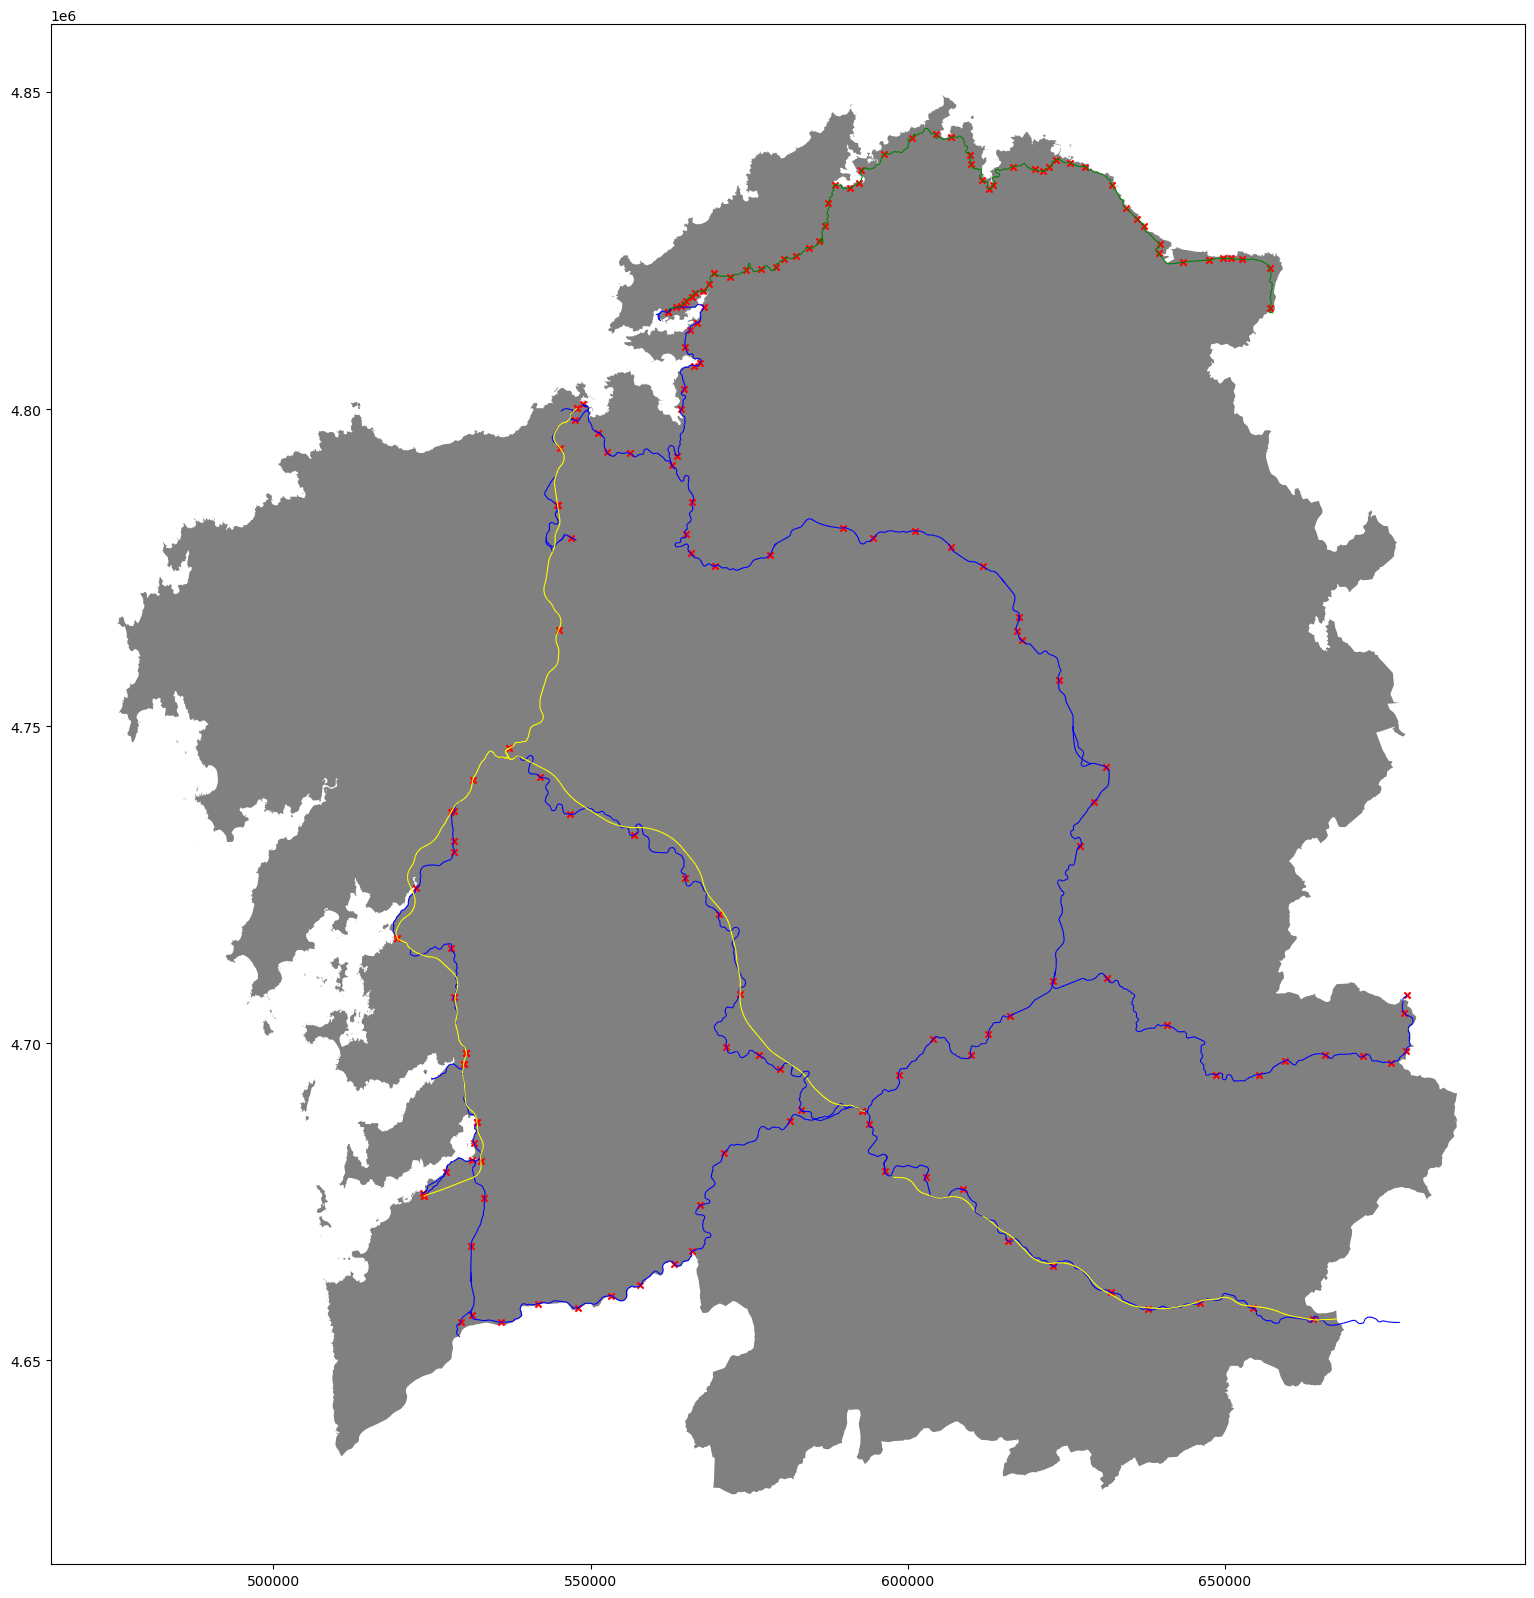

In [17]:
base = df_galicia.plot(color='gray',figsize=(20,20))
df_vias.plot(ax=base,linewidth=0.8,color=df_vias.color)
df_estacions[df_estacions.ESTADO == 'USO'].plot(ax=base,color='red',markersize=20,marker='x')